In [ ]:
# Binary Classification
# IMDB Dataset: positive or negative sentiment
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data[0])
print(train_labels[0]) # positive

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
# decoding the tokenized review back to english
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
#Multi-hot encoding
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # the dot is to make sure the datatype is floating point
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train.shape

(25000, 10000)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
y_train[0]

1.0

In [ ]:
import keras

# model with no reg layers added
# model = keras.Sequential([
#     keras.Input(shape=(X_train.shape[1],)),
#     keras.layers.Dense(16, activation='relu'),
#     keras.layers.Dense(16, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model with L1 and L2 added
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.L1L2(l1=0.001, l2=0.002)),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.L1L2(l1=0.001, l2=0.002)),
    keras.layers.Dense(1, activation='sigmoid')
])

#model with dropout
# model = keras.Sequential([
#     keras.Input(shape=(X_train.shape[1],)),
#     keras.layers.Dense(16, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(16, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# (input_features * units) + units
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                     │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6486 - loss: 1.5425 - val_accuracy: 0.8008 - val_loss: 0.7469
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8389 - loss: 0.6908 - val_accuracy: 0.8558 - val_loss: 0.6401
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8554 - loss: 0.6240 - val_accuracy: 0.7764 - val_loss: 0.7231
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8562 - loss: 0.6063 - val_accuracy: 0.8024 - val_loss: 0.6676
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8640 - loss: 0.5848 - val_accuracy: 0.8454 - val_loss: 0.5980
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8680 - loss: 0.5691 - val_accuracy: 0.8392 - val_loss: 0.6089
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8682 - loss: 0.5629 - val_accuracy: 0.8532 - val_loss: 0.5748
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8711 - loss: 0.5500 - val_accuracy: 0.8706 - v

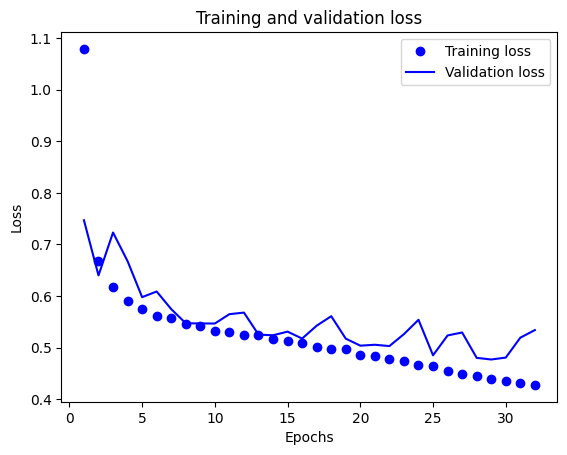

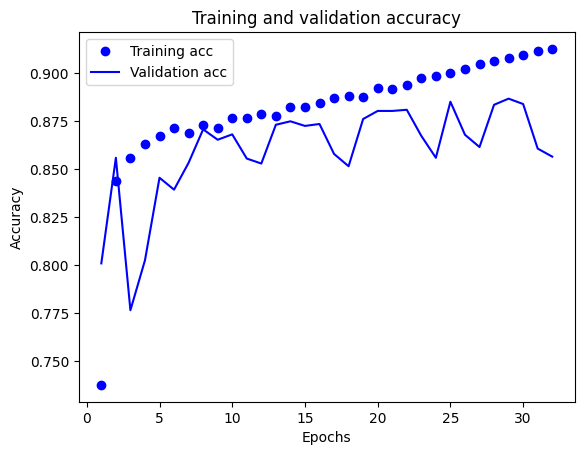

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
results

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8463 - loss: 0.5487


[0.5507593154907227, 0.8467199802398682]